## Analys

In [29]:
import pandas as pd 

df = pd.read_csv("../data/raw/dataset.csv")
df.head()

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Unvorhergesehener Absturz der Datenanalyse-Pla...,Die Datenanalyse-Plattform brach unerwartet ab...,Ich werde Ihnen bei der Lösung des Problems he...,Incident,General Inquiry,low,de,Crash,Technical,Bug,Hardware,Resolution,Outage,Documentation,NaN
1,Customer Support Inquiry,Seeking information on digital strategies that...,We offer a variety of digital strategies and s...,Request,Customer Service,medium,en,Feedback,Sales,IT,Tech Support,NaN,NaN,NaN,NaN
2,Data Analytics for Investment,I am contacting you to request information on ...,I am here to assist you with data analytics to...,Request,Customer Service,medium,en,Technical,Product,Guidance,Documentation,Performance,Feature,NaN,NaN
3,Krankenhaus-Dienstleistung-Problem,Ein Medien-Daten-Sperrverhalten trat aufgrund ...,Zurück zur E-Mail-Beschwerde über den Sperrver...,Incident,Customer Service,high,de,Security,Breach,Login,Maintenance,Incident,Resolution,Feedback,NaN
4,Security,"Dear Customer Support, I am reaching out to in...","Dear [name], we take the security of medical d...",Request,Customer Service,medium,en,Security,Customer,Compliance,Breach,Documentation,Guidance,NaN,NaN


In [30]:
df.shape

(20000, 15)

In [31]:
df.columns.tolist()

['subject',
 'body',
 'answer',
 'type',
 'queue',
 'priority',
 'language',
 'tag_1',
 'tag_2',
 'tag_3',
 'tag_4',
 'tag_5',
 'tag_6',
 'tag_7',
 'tag_8']

In [32]:
df.type

0        Incident
1         Request
2         Request
3        Incident
4         Request
           ...   
19995     Problem
19996      Change
19997     Request
19998    Incident
19999      Change
Name: type, Length: 20000, dtype: object

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   subject   18539 non-null  object
 1   body      19998 non-null  object
 2   answer    19996 non-null  object
 3   type      20000 non-null  object
 4   queue     20000 non-null  object
 5   priority  20000 non-null  object
 6   language  20000 non-null  object
 7   tag_1     20000 non-null  object
 8   tag_2     19954 non-null  object
 9   tag_3     19905 non-null  object
 10  tag_4     18461 non-null  object
 11  tag_5     13091 non-null  object
 12  tag_6     7351 non-null   object
 13  tag_7     3928 non-null   object
 14  tag_8     1907 non-null   object
dtypes: object(15)
memory usage: 2.3+ MB


In [34]:
df.describe()

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
count,18539,19998,19996,20000,20000,20000,20000,20000,19954,19905,18461,13091,7351,3928,1907
unique,18539,19998,19996,4,10,3,2,148,204,344,481,578,566,492,386
top,Unvorhergesehener Absturz der Datenanalyse-Pla...,Die Datenanalyse-Plattform brach unerwartet ab...,Ich werde Ihnen bei der Lösung des Problems he...,Incident,Technical Support,medium,en,Technical,Performance,IT,Tech Support,Tech Support,Resolution,Resolution,Documentation
freq,1,1,1,7978,5824,8144,11923,5034,2795,3309,3436,2287,841,417,162


In [35]:
df["type"].value_counts()

type
Incident    7978
Request     5763
Problem     4184
Change      2075
Name: count, dtype: int64

In [36]:
df.isnull().sum()

subject      1461
body            2
answer          4
type            0
queue           0
priority        0
language        0
tag_1           0
tag_2          46
tag_3          95
tag_4        1539
tag_5        6909
tag_6       12649
tag_7       16072
tag_8       18093
dtype: int64

In [37]:
null_percent = (df.isnull().sum() / len(df)) * 100
print(null_percent)

subject      7.305
body         0.010
answer       0.020
type         0.000
queue        0.000
priority     0.000
language     0.000
tag_1        0.000
tag_2        0.230
tag_3        0.475
tag_4        7.695
tag_5       34.545
tag_6       63.245
tag_7       80.360
tag_8       90.465
dtype: float64


In [38]:
cols_to_check = ["tag_2", "tag_3", "tag_4"]

df = df.dropna(subset=cols_to_check)

In [39]:
cols = ["subject", "body", "answer"]
df[cols] = df[cols].fillna("")

In [40]:
df = df.drop(columns=["tag_5", "tag_6", "tag_6", "tag_7", "tag_8"])

In [41]:
df.isnull().sum()

subject     0
body        0
answer      0
type        0
queue       0
priority    0
language    0
tag_1       0
tag_2       0
tag_3       0
tag_4       0
dtype: int64

In [ ]:
# duplicates
df.duplicated().sum()

0

## Visualisation

<function matplotlib.pyplot.show(close=None, block=None)>

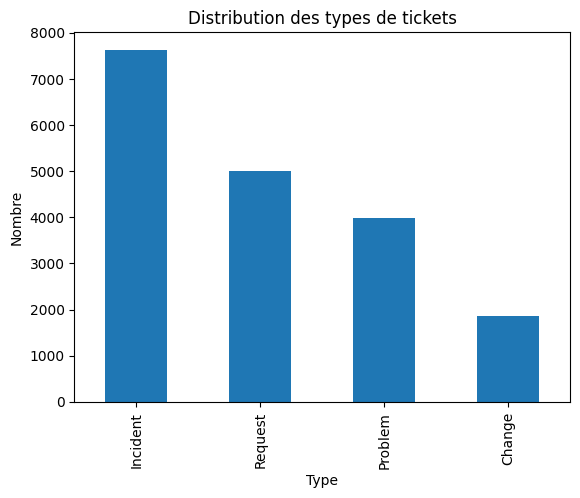

In [42]:
import matplotlib.pyplot as plt

df["type"].value_counts().plot(kind="bar")
plt.title("Distribution des types de tickets")
plt.xlabel("Type")
plt.ylabel("Nombre")
plt.show


In [46]:
df["text"] = df["subject"] + df["body"]


In [50]:
# analyser la longueur
df["text_len"] = df["text"].apply(len)

In [51]:
df.head()

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,text,text_len
0,Die Datenanalyse-Plattform brach unerwartet ab...,Die Datenanalyse-Plattform brach unerwartet ab...,Ich werde Ihnen bei der Lösung des Problems he...,Incident,General Inquiry,low,de,Crash,Technical,Bug,Hardware,Die Datenanalyse-Plattform brach unerwartet ab...,504
1,Seeking information on digital strategies that...,Seeking information on digital strategies that...,We offer a variety of digital strategies and s...,Request,Customer Service,medium,en,Feedback,Sales,IT,Tech Support,Seeking information on digital strategies that...,450
2,I am contacting you to request information on ...,I am contacting you to request information on ...,I am here to assist you with data analytics to...,Request,Customer Service,medium,en,Technical,Product,Guidance,Documentation,I am contacting you to request information on ...,1392
3,Ein Medien-Daten-Sperrverhalten trat aufgrund ...,Ein Medien-Daten-Sperrverhalten trat aufgrund ...,Zurück zur E-Mail-Beschwerde über den Sperrver...,Incident,Customer Service,high,de,Security,Breach,Login,Maintenance,Ein Medien-Daten-Sperrverhalten trat aufgrund ...,442
4,"Dear Customer Support, I am reaching out to in...","Dear Customer Support, I am reaching out to in...","Dear [name], we take the security of medical d...",Request,Customer Service,medium,en,Security,Customer,Compliance,Breach,"Dear Customer Support, I am reaching out to in...",1350
